## Import the needed libraries and functions


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering as aggcluster
from sklearn_extra.cluster import KMedoids as kmedcluster
from sklearn.decomposition import PCA as PCA

### Read the csv Iris classified data

In [2]:
data = pd.read_csv(r'Iris.csv')
#set the id as the integer index
data = data.set_index('Id')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
#Normalize our data with a minmax function
data.iloc[:,0:4] =  (data.iloc[:,0:4] - np.min(data.iloc[:,0:4])) / (np.max(data.iloc[:,0:4]) - np.min(data.iloc[:,0:4]))

In [4]:
#We have four dimensions, we can't visualize them, so we reduce them to 3 with PCA
pca = PCA(n_components= 3)
reduced_data  =pca.fit_transform(data.iloc[:,0:4])

In [5]:
datanew = data.copy()
datanew = datanew.drop(['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm' , 'PetalLengthCm'],axis = 1)
reduced_df = pd.DataFrame(reduced_data)
reduced_df.index = datanew.index
datanew = pd.concat([datanew,reduced_df], axis=1)
datanew['Species'] = datanew['Species'].map({'Iris-versicolor': 0 , 'Iris-setosa' : 1, 'Iris-virginica':2 })

Concatenate our classes with our reduced data frame with respect to each other

#  Visualizing our data, color being on a class basis and the 3rd component determining it's size giving  a 3D effect

D:\Anaconda\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


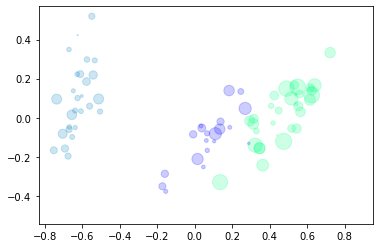

In [6]:
plt.scatter(datanew.iloc[:,1],datanew.iloc[:,2],s = 1000*datanew.iloc[:,3] , alpha = 0.2, c = datanew.Species , cmap='winter')

In [7]:
ag = aggcluster(3, affinity = 'euclidean')
result = ag.fit_predict(datanew.iloc[:,1::])

## How does agglomerative clustering do, in simple visualization?

D:\Anaconda\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


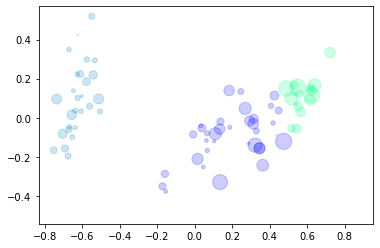

In [8]:
plt.scatter(datanew.iloc[:,1],datanew.iloc[:,2],s = 1000*datanew.iloc[:,3] , alpha = 0.2, c = result , cmap='winter')

In [9]:
comparison = pd.DataFrame({'Clustered':result,'True': datanew.Species})
comparison['Correct'] = comparison['Clustered'] == comparison['True']
comparison.Correct.value_counts()

True     128
False     22
Name: Correct, dtype: int64

In [10]:
(150-16)/150
#our accuracy

0.8933333333333333

## 89.3% correct, this is mostly because data isn't very spherically shaped

# What about k-medoids?

D:\Anaconda\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


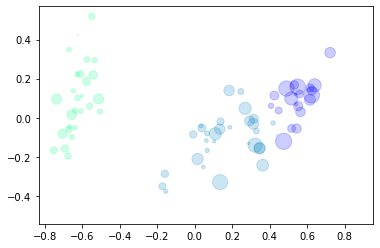

In [11]:
km = kmedcluster(3, metric = 'manhattan')
result = km.fit_predict(datanew.iloc[:,1::])
plt.scatter(datanew.iloc[:,1],datanew.iloc[:,2],s = 1000*datanew.iloc[:,3] , alpha = 0.2, c = result , cmap='winter')

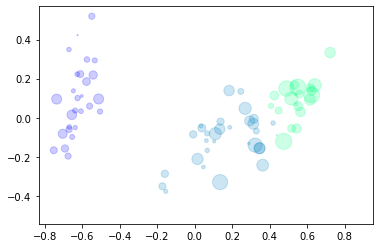

In [12]:
#fix the class values
result = np.array(pd.Series(result).map({1:1 ,2:0, 0:2}))
plt.scatter(datanew.iloc[:,1],datanew.iloc[:,2],s = 1000*datanew.iloc[:,3] , alpha = 0.2, c = result , cmap='winter')

In [13]:
#fixed
comparison = pd.DataFrame({'Clustered':result,'True': datanew.Species})
comparison['Correct'] = comparison['Clustered'] == comparison['True']
comparison.Correct.value_counts()

False    116
True      34
Name: Correct, dtype: int64

In [14]:
(150-13)/150
#our kmedoids accuracy

0.9133333333333333

# 91.3% ! Better but still suffers from non-spherical data!